In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix


In [2]:
#Data loading
df = pd.read_csv("churn.csv")
print(df.shape)
df.head()

(10000, 14)


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
percentage_one = (df[df.Exited == 1].sum().Exited)/df.shape[0] #The percentage of labels that are 1
percentage_zero  = (df.shape[0] - percentage_one*df.shape[0])/df.shape[0] #The percentage of labels that are 0
print("The percentage of 1 labels:",percentage_one,"\n","The percentage of 0 labels:",percentage_zero)

The percentage of 1 labels: 0.2037 
 The percentage of 0 labels: 0.7963


In [4]:
#Keep only relavant columns
X = df[['Geography','Gender','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
print(X.shape)
X.head()

(10000, 10)


,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,France,Female,619,42,2,0.00,1,1,1,101348.88
1,Spain,Female,608,41,1,83807.86,1,0,1,112542.58
2,France,Female,502,42,8,159660.80,3,1,0,113931.57
3,France,Female,699,39,1,0.00,2,0,0,93826.63
4,Spain,Female,850,43,2,125510.82,1,1,1,79084.10


In [5]:
#Encode categorial features to 
column_that_string = ["Geography","Gender"]
X= pd.get_dummies(X, columns=column_that_string)
print(X.shape)
X.head()

(10000, 13)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [14]:
Y= df.Exited
print(Y.shape)
Y.head()

(10000,)


0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [7]:
#Build train, test datasets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=percentage_one, random_state=42)  
print(" The percentage of 1 labels in  train set:",(y_train.sum())/y_train.shape[0],"\n","The percentage of 0 labels in test set:",(y_test.sum())/y_test.shape[0])

 The percentage of 1 labels in  train set: 0.20507346477458244 
 The percentage of 0 labels in test set: 0.19833087874324987


In [8]:
#when the label ('Exited') is 1 it's mean the custmer left us.
#FP = we think its 1 and its 0
#FN = we think its 0 and its 1

def calc_error(Model,X_train, X_test, y_train, y_test,alpha = 0.2):
  tn, fp, fn, tp = confusion_matrix(y_test, Model.fit(X_train, y_train).predict(X_test)).ravel()
  fp = fp/y_test.shape[0]
  fn = fn/y_test.shape[0]
  return 1-(alpha*fp +(1-alpha)*fn) 

In [9]:
# Baseline prediction
alpha = 0.2
y_pred= [0]*y_test.shape[0]
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
fp = fp/y_test.shape[0]
fn = fn/y_test.shape[0]
print("for all 0:", 1-(alpha*fp +(1-alpha)*fn) )
y_pred= [1]*y_test.shape[0]
tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
fp = fp/y_test.shape[0]
fn = fn/y_test.shape[0]
print("for all 1:", 1-(alpha*fp +(1-alpha)*fn) )

for all 0: 0.8413352970054001
for all 1: 0.83966617574865


 Model 1: Nearest neighbors

In [10]:
model = KNeighborsClassifier(n_neighbors=5)
KNeighbors= calc_error(model, X_train, X_test, y_train, y_test,0.2)
print(KNeighbors)

0.8447717231222386


Model 3: Decision Tree

In [11]:
# create Decision Tree Classifer object
model = DecisionTreeClassifier()
DecisionTree = calc_error(model, X_train, X_test, y_train, y_test,0.2)
print(DecisionTree)

0.8958271968581247


Model 4: Random forest

In [12]:
# initialize a random forest classifier with 1000 decision trees
model = RandomForestClassifier(n_estimators = 1000, random_state = 1) 
# random_state is an arbitrary seed to the random number generator 
RandomForest = calc_error(model, X_train, X_test, y_train, y_test,0.2)
print(RandomForest)

0.9080019636720668


Model 5: GradientBoosting

In [15]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
GradientBoosting = calc_error(model, X_train, X_test, y_train, y_test,0.2)
print(GradientBoosting)

0.9094747177221404


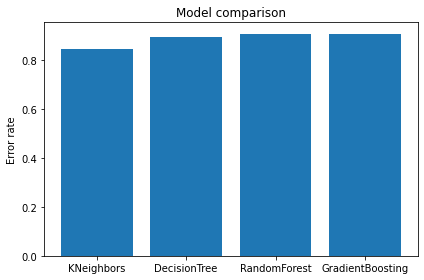

In [16]:
#Prediction results graph
X_axis = ['KNeighbors', 'DecisionTree', 'RandomForest', 'GradientBoosting']
y_axis = [ KNeighbors, DecisionTree, RandomForest, GradientBoosting]

fig,ax1 = plt.subplots()
rects3 = ax1.bar(X_axis , y_axis)
ax1.set_ylabel('Error rate')
ax1.set_title('Model comparison')
ax1.set_xticks(X_axis)
ax1.set_xticklabels(X_axis)
fig.tight_layout()
plt.show()